In [2]:
# Implement the main EM algorithm for the mixture of Gaussians model
    # Input: data file, number of clusters, number of iterations
    # Output: the final parameters of the model

In [14]:
# Expectation-Maximization algorithm
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
from tqdm import tqdm

### A) The gaussian 2-dim data on file  2gaussian.txt  has been generated  using a mixture  of  two Gaussians, each  2-dim, with the parameters below. Run the EM algorithm with random initial values to recover the parameters.
mean_1 [3,3]); cov_1 = [[1,0],[0,3]]; n1=2000 points

mean_2 =[7,4]; cov_2 = [[1,0.5],[0.5,1]]; ; n2=4000 points

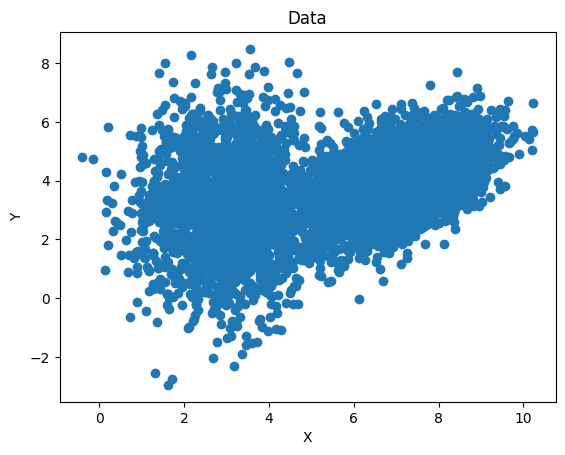

In [6]:
# read input data from 2gaussian.txt

data = np.loadtxt("2gaussian.txt")

# plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


100%|██████████| 10000/10000 [00:09<00:00, 1006.30it/s]


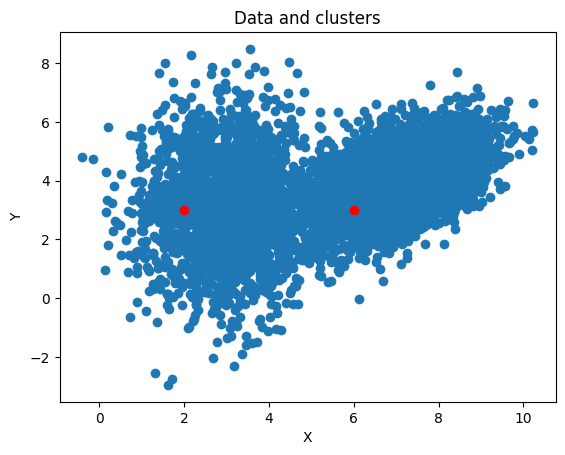

mu [[2 3]
 [6 3]]
sigma [[[1.1870509  0.88052325]
  [0.88052325 2.82465135]]

 [[2.56424441 1.74078634]
  [1.74078634 2.1407264 ]]]


In [20]:
from scipy.stats import multivariate_normal

def multivariate_gaussian(x, mean, cov):
    try:
        return multivariate_normal.pdf(x, mean=mean, cov=cov)
    except np.linalg.LinAlgError:
        # Add a small value to the diagonal elements to avoid singular matrix error
        cov = cov.astype(np.float64) + np.eye(cov.shape[0]) * 1e-6
        return multivariate_normal.pdf(x, mean=mean, cov=cov)

# group into 2 clusters
k = 2
# number of iterations
iterations = 10000

# initialize the parameters
# means
mu = np.array([[0, 0], [1, 1]])
# covariances
sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]]], dtype=np.float64)
# mixing coefficients
pi = np.array([0.5, 0.5])
# responsibilities
r = np.zeros((data.shape[0], k))
# iterate
for i in tqdm(range(iterations)):
    # E-step
    for j in range(k):
        r[:, j] = pi[j] * multivariate_gaussian(data, mu[j], sigma[j])
    r /= np.sum(r, axis=1)[:, np.newaxis]
    # M-step
    for j in range(k):
        N_j = np.sum(r[:, j])
        mu[j] = np.sum(r[:, j][:, np.newaxis] * data, axis=0) / N_j
        diff = data - mu[j]
        sigma[j] = np.dot(r[:, j] * diff.T, diff) / N_j
        sigma[j] += np.eye(sigma[j].shape[0]) * 1e-6  # Add a small value to the diagonal elements
        pi[j] = N_j / data.shape[0]
    # print the parameters
    # print("Iteration", i)
    # print("mu", mu)
    # print("sigma", sigma)
    # print("pi", pi)
    # print("r", r)

# plot the data and the clusters
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(mu[:, 0], mu[:, 1], c="red")
plt.title("Data and clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
print("mu", mu)
print("sigma", sigma)

In [ ]:
# 

### B) Same problem for 2-dim data on file 3gaussian.txt , generated using a mixture of three Gaussians. Verify your  findings against the true parameters used generate the data below.
mean_1 = [3,3] ; cov_1 = [[1,0],[0,3]]; n1=2000

mean_2 = [7,4] ; cov_2 = [[1,0.5],[0.5,1]] ; n2=3000

mean_3 = [5,7] ; cov_3 = [[1,0.2],[0.2,1]]    ); n3=5000
